In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import genfromtxt


In [2]:
## Generation of a new dataset
## we'll choose 3 functions,log10(x),sqrt(x),x
## The size of the dataset will be 300

In [3]:
a=np.zeros((300,1))


In [4]:
# for i in range(1,101):
#     a[i-1]=np.log10(i)
# #print(a[:100])

In [5]:
# for i in range(101,201):
#     a[i-1]=np.log2(i)
# #print(a[100:200])

In [6]:
# for i in range(201,301):
#     a[i-1]=np.sqrt(i)

In [7]:
# #print(a)
# for i in range(300):
#     if(a[i]==0):
#         print(i)

In [8]:
independent=np.zeros((300,1))
for i in range(300):
    independent[i]=i+1


In [9]:
# print(independent)

In [10]:
## Adding Noise

# for i in range(300):
#     a[i]+=3*np.random.randn()

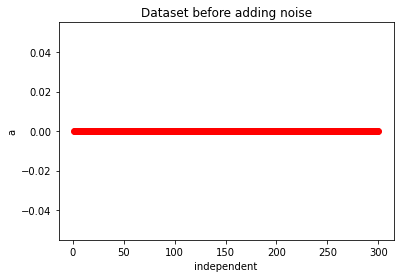

In [11]:
plt.scatter(independent,a,color="red")
#plt.plot(x,regressor.predict(x),color="blue")
#plt.title("SLR model(Salary prediction)")
plt.title("Dataset before adding noise")
plt.xlabel("independent")
plt.ylabel("a")
plt.show()

In [12]:
## Adding Noise

# for i in range(300):
#     a[i]+=np.random.randn()

In [13]:
a= genfromtxt('data_3_functions.csv', delimiter=',')

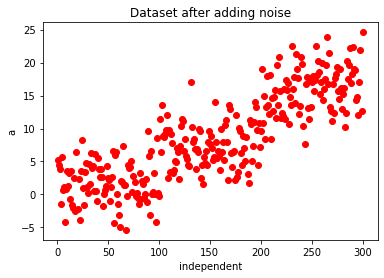

In [14]:
plt.scatter(independent,a,color="red")
plt.title("Dataset after adding noise")
plt.xlabel("independent")
plt.ylabel("a")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,a,test_size=0.2,random_state=0) 

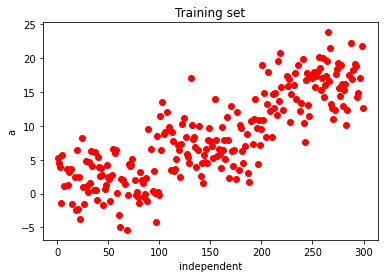

In [16]:
plt.scatter(x_train,y_train,color="red")
plt.title("Training set")
plt.xlabel("independent")
plt.ylabel("a")
plt.show()

In [17]:
## Simple linear regression
from sklearn.preprocessing import PolynomialFeatures
lin_reg=PolynomialFeatures(degree=1) ## y=bx^0+bx+bx^2 ----u may consider this as a MLR model with 4 features
x_lin=lin_reg.fit_transform(x_train)##this is the required matrix
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_lin,y_train)


LinearRegression()

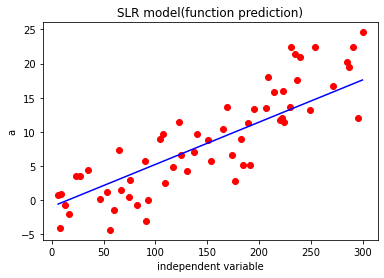

In [18]:
## Since the previous curve looks like st.line joining the points,hence in order to give a curvy feel to our graph,we'll need a change in the code
x_grid=np.arange(min(x_test),max(x_test),0.1) ##arange from numpy-increasing the points by 0.1 instead of having integers
x_grid=x_grid.reshape((len(x_grid)),1)

##standard process(replacing x_grid by x)
plt.scatter(x_test,y_test,color="red")
##training xgrid
x_grid_lin=lin_reg.fit_transform(x_grid)
plt.plot(x_grid,regressor.predict(x_grid_lin),color="blue")
plt.title("SLR model(function prediction)")
plt.xlabel("independent variable")
plt.ylabel("a")
plt.show()

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error
pred=regressor.predict(lin_reg.fit_transform(x_test))
rms1 = sqrt(mean_squared_error(y_test, pred))
print(rms1)

3.9908825425826513


In [20]:
## Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3) ## y=bx^0+bx+bx^2 ----u may consider this as a MLR model with 4 features
x_poly=poly_reg.fit_transform(x_train)##this is the required matrix
from sklearn.linear_model import LinearRegression
regressor2=LinearRegression()
regressor2.fit(x_poly,y_train)


LinearRegression()

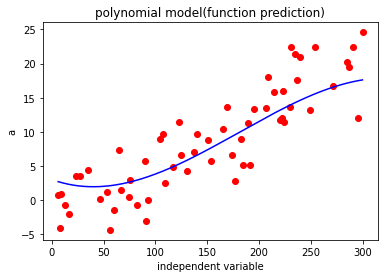

In [21]:
## Since the previous curve looks like st.line joining the points,hence in order to give a curvy feel to our graph,we'll need a change in the code
x_grid=np.arange(min(x_test),max(x_test),0.1) ##arange from numpy-increasing the points by 0.1 instead of having integers
x_grid=x_grid.reshape((len(x_grid)),1)

##standard process(replacing x_grid by x)
plt.scatter(x_test,y_test,color="red")
##training xgrid
x_grid_poly=poly_reg.fit_transform(x_grid)
plt.plot(x_grid,regressor2.predict(x_grid_poly),color="blue")
plt.title("polynomial model(function prediction)")
plt.xlabel("independent variable")
plt.ylabel("a")
plt.show()

In [22]:

from math import sqrt
from sklearn.metrics import mean_squared_error
pred2=regressor2.predict(poly_reg.fit_transform(x_test))
rms2 = sqrt(mean_squared_error(y_test, pred2))
print(rms2)

3.909191943594077


In [23]:
## B-spline

xp = np.linspace(x_test.min(),x_test.max(),20)
## Generating 4 degree  spline
transformed_x = dmatrix("bs(train, knots=(75,150,225),degree=4 ,include_intercept=False)", {"train": x_train},return_type='dataframe')
x_spline = sm.GLM(y_train, transformed_x).fit()
pred=x_spline.predict(dmatrix("bs(xp, knots=(75,150,225),degree =4 ,include_intercept=False)",{"xp": xp}, return_type='dataframe'))
pred_orig=x_spline.predict(dmatrix("bs(valid, knots=(75,150,225),degree =4,include_intercept=False)",{"valid": x_test}, return_type='dataframe'))

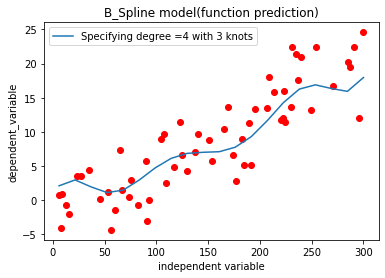

In [24]:
# Plot the splines and error bands
#plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)


plt.scatter(x_test,y_test,color="red")
plt.plot(xp,pred, label='Specifying degree =4 with 3 knots')
#plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.title("B_Spline model(function prediction)")
plt.xlabel("independent variable")
plt.ylabel("dependent_variable")
plt.show()

In [25]:
rms3 = sqrt(mean_squared_error(y_test, pred_orig))
print(rms3)

3.6879318600424904


In [26]:
## Cyclic cubic spline

transformed_x4 = dmatrix("cc(train,df = 6)", {"train": x_train}, return_type='dataframe')
cyclic_spline = sm.GLM(y_train, transformed_x4).fit()
pred5_orig = cyclic_spline.predict(dmatrix("cc(valid, df=6)", {"valid": x_test}, return_type='dataframe'))
pred5 = cyclic_spline.predict(dmatrix("cc(xp, df=6)", {"xp": xp}, return_type='dataframe'))

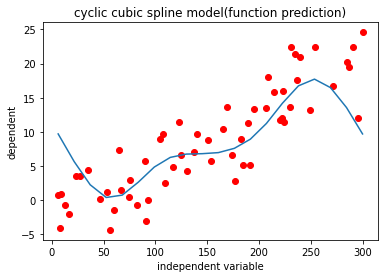

In [27]:
plt.scatter(x_test,y_test,color="red")
plt.plot(xp, pred5)
plt.title("cyclic cubic spline model(function prediction)")
plt.xlabel("independent variable")
plt.ylabel("dependent")
plt.show()

In [28]:
rms4 = sqrt(mean_squared_error(y_test, pred5_orig))
print(rms4)

4.937999205450255


In [29]:
# Natural cubic spline

transformed_x3 = dmatrix("cr(train,df = 3)", {"train": x_train}, return_type='dataframe')


In [30]:
natural_spline = sm.GLM(y_train, transformed_x3).fit()

In [31]:
xp = np.linspace(x_test.min(),x_test.max(),20)
pred3_orig = natural_spline.predict(dmatrix("cr(xp, df=3)",{"xp": x_test} , return_type='dataframe'))
pred3 = natural_spline.predict(dmatrix("cr(xp, df=3)",{"xp": xp} , return_type='dataframe'))

In [32]:
rms5 = sqrt(mean_squared_error(y_test, pred3_orig))
print(rms5)

3.9501548691647135


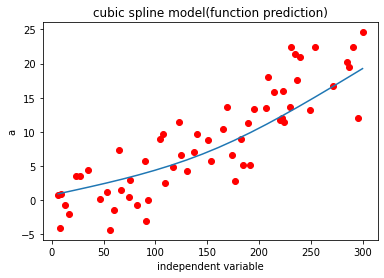

In [33]:
plt.scatter(x_test,y_test,color="red")
plt.plot(xp, pred3, label='Specifying degree =2 with 3 knots')
plt.title("cubic spline model(function prediction)")
plt.xlabel("independent variable")
plt.ylabel("a")
plt.show()